In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import cv as cv2

In [10]:
from keras.datasets import cifar100
(X_train,y_train),(X_test,y_test) = cifar100.load_data()

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_train.max()

99

In [13]:
import matplotlib.pyplot as plt


In [15]:
import numpy as np
X_train=np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test=np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])


AttributeError: module 'cv' has no attribute 'cvtColor'

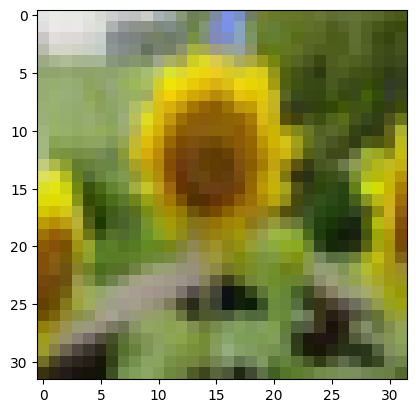

In [16]:

plt.imshow(X_train[12])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[1.        , 1.        , 1.        , ..., 0.78431373, 0.85098039,
        0.7254902 ],
       [1.        , 0.99607843, 0.99607843, ..., 0.65882353, 0.61176471,
        0.55294118],
       [1.        , 0.99607843, 1.        , ..., 0.74117647, 0.63529412,
        0.4627451 ],
       ...,
       [0.58431373, 0.54901961, 0.54509804, ..., 0.05490196, 0.18823529,
        0.23529412],
       [0.49411765, 0.47843137, 0.50980392, ..., 0.05098039, 0.36862745,
        0.5372549 ],
       [0.36862745, 0.36470588, 0.41960784, ..., 0.10980392, 0.42352941,
        0.55294118]])

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(32,32)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(100,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               131200    
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 100)               3300      
                                                                 
Total params: 155,140
Trainable params: 155,140
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
import cv2

from keras.callbacks import EarlyStopping

import numpy as np

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto', baseline=None, restore_best_weights=False)


In [ ]:
history = model.fit(X_train,y_train,epochs=100,batch_size=1000, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
40/40 [==============================] - 1s 27ms/step - loss: 3.6808 - accuracy: 0.0553 - val_loss: 3.0178 - val_accuracy: 0.0707
Epoch 2/100
40/40 [==============================] - 1s 22ms/step - loss: 2.9318 - accuracy: 0.0997 - val_loss: 2.8857 - val_accuracy: 0.1045
Epoch 3/100
40/40 [==============================] - 1s 22ms/step - loss: 2.8614 - accuracy: 0.1208 - val_loss: 2.8341 - val_accuracy: 0.1315
Epoch 4/100
40/40 [==============================] - 1s 23ms/step - loss: 2.8253 - accuracy: 0.1338 - val_loss: 2.8095 - val_accuracy: 0.1377
Epoch 5/100
40/40 [==============================] - 1s 22ms/step - loss: 2.7962 - accuracy: 0.1412 - val_loss: 2.7975 - val_accuracy: 0.1383
Epoch 6/100
40/40 [==============================] - 1s 23ms/step - loss: 2.7740 - accuracy: 0.1472 - val_loss: 2.7675 - val_accuracy: 0.1522
Epoch 7/100
40/40 [==============================] - 1s 23ms/step - loss: 2.7553 - accuracy: 0.1549 - val_loss: 2.7492 - val_accuracy: 0.1602
Epoch 

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.2382

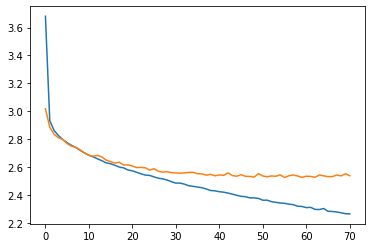

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

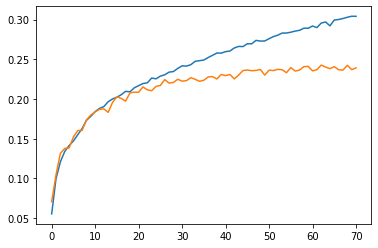

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

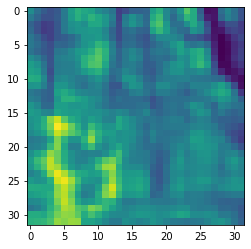